# **Red hat project**

# Part III. Modelling

In [74]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import cross_validate, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.inspection import plot_partial_dependence
import xgboost as xgb
from catboost import CatBoostClassifier

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
sns.set(rc={'figure.figsize':(15,10)})

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)

In [4]:
plots_path = './plots'

## 1. Importing data

In [5]:
X_train = pd.read_csv('./csv_files/red_hat_train.csv', index_col = 'activity_index')
X_test = pd.read_csv('./csv_files/red_hat_test.csv', index_col = 'activity_index')

In [6]:
y_train = np.ravel(pd.read_csv('./csv_files/outcome_train.csv', index_col = 'activity_index'))
y_test = np.ravel(pd.read_csv('./csv_files/outcome_test.csv', index_col = 'activity_index'))

In [7]:
X_train.head()

,char_4_pep,char_5_pep,char_7_pep,char_9_pep,char_10_pep,char_11,char_12,char_14,char_17,char_20,char_25,char_27,char_30,char_31,char_32,char_33,char_34,char_35,char_37,month_pep,year_pep,weekend_flg_pep,year_act,weekend_flg_act
activity_index,,,,,,,,,,,,,,,,,,,,,,,,
"(2, 3769922)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576,0.091,0,0,0
"(2, 2255070)",0.469,0.162,0.519,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.477,0.091,0,0,1
"(2, 1102570)",0.535,0.064,0.390,0.249,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0.450,0.091,0,0,0
"(2, 4143394)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500,0.189,1,1,1
"(2, 3554173)",0.360,0.025,0.390,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.450,0.091,0,0,0


In [8]:
X_test.head()

,char_4_pep,char_5_pep,char_7_pep,char_9_pep,char_10_pep,char_11,char_12,char_14,char_17,char_20,char_25,char_27,char_30,char_31,char_32,char_33,char_34,char_35,char_37,month_pep,year_pep,weekend_flg_pep,year_act,weekend_flg_act
activity_index,,,,,,,,,,,,,,,,,,,,,,,,
"(2, 2791174)",0.386,0.069,0.898,0.249,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0.346,0.091,1,0,0
"(2, 4219859)",0.360,0.025,0.519,0.249,1,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0.500,0.166,1,1,0
"(2, 2522827)",0.386,0.115,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576,0.189,0,1,0
"(2, 908393)",0.360,0.025,0.104,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500,0.554,0,1,0
"(2, 4370791)",0.557,0.055,0.059,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.346,0.091,0,0,0


In [9]:
X_train.shape

(1713886, 24)

## 2. Testing default models

**Three models with default parameters** will be trained in order to pick one model with the best results and perform parameter tuning.
- Random Forest
- XGBoost
- CatBoost

In [12]:
random_seed = 42

In [13]:
rf = RandomForestClassifier(random_state=random_seed)
xg = xgb.XGBClassifier(random_state=random_seed)
cb = CatBoostClassifier(random_seed=random_seed)

In [14]:
def make_predictions(classifier, X, y):
    """
    The function takes in a fitted model, dataframe with features and a numpy array with the outcomes and returns
    """
    pred = cross_val_predict(classifier, X, y, cv =5, method = 'predict_proba', verbose = False)
    return pred

In [15]:
def evaluate_scores(y, y_pred, thresh=0.5):
    
    y_pred_vals = (y_pred[:,1] >= thresh).astype('int')
    
    # metrics
    acc = accuracy_score(y, y_pred_vals)
    prec = precision_score(y, y_pred_vals)
    rec = recall_score(y, y_pred_vals)
    f1 = f1_score(y, y_pred_vals)
    roc = roc_auc_score(y, y_pred_vals)
    
    metrics = pd.DataFrame({'metrics': ['accuracy', 'precision','recall','f1','roc_auc'],
                            'scores': [acc, prec, rec, f1, roc]})
    
    return metrics

In [16]:
def evaluate_cmatrix(y, y_pred, thresh = 0.5):
    
    y_pred_vals = (y_pred[:,1] >= thresh).astype('int')
    
    tn, fp, fn, tp = confusion_matrix(y, y_pred_vals).ravel()
    
    cmatrix = pd.DataFrame({'PN': [tn, fn],
                            'PP':[fp, tp]},
                            index = ['TN','TP'])
    
    return cmatrix

In [17]:
def plot_feature_importance(classifier, classifier_name, X, random_seed, what_params = 'default'):
    feature_importance = pd.DataFrame(classifier.feature_importances_,
                                      index = X.columns,
                                      columns = ['importance']).sort_values('importance', ascending= False)
    
    feature_importance['features'] = feature_importance.index
    feature_importance.reset_index(drop=True, inplace=True)
    features = feature_importance['features']
    importances = feature_importance['importance']
    indices = np.argsort(importances)
    
    plt.barh(range(len(indices)), importances[indices], color = '#93A8AC', align = 'center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.title(f'Feature importance - {classifier_name} with {what_params} hyperparameters')
    plt.savefig(os.path.join(plots_path, f'feature_importance_{what_params}_{classifier_name}.png'))

### 2.1. Random Forest

In [70]:
rf.fit(X_train, y_train)

/home/joannal/Documents/python_projects/python37_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_train_pred  = make_predictions(rf, X_train, y_train)
y_test_pred  = make_predictions(rf, X_test, y_test)

In [72]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [73]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [74]:
metrics_train

,metrics,scores
0,accuracy,0.943
1,precision,0.940
2,recall,0.931
3,f1,0.935
4,roc_auc,0.942


In [75]:
metrics_test

,metrics,scores
0,accuracy,0.921
1,precision,0.910
2,recall,0.912
3,f1,0.911
4,roc_auc,0.920


In [76]:
cm_train

,PN,PP
TN,907435,45564
TP,52606,708281


In [77]:
cm_test

,PN,PP
TN,249346,19449
TP,18809,195801


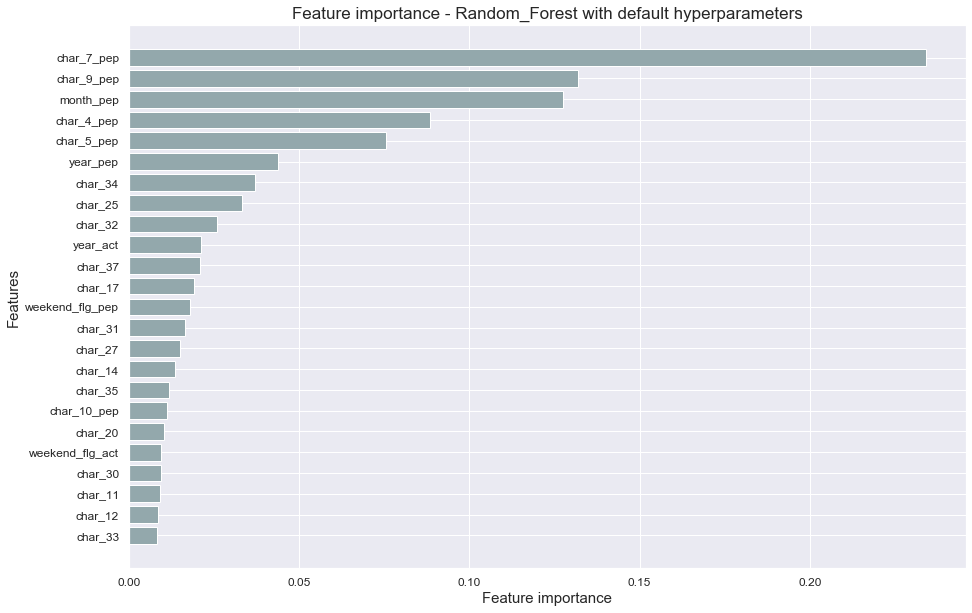

In [85]:
plot_feature_importance(rf, "Random_Forest", X_train, random_seed)

### 2.2. XGBoost

In [86]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [87]:
y_train_pred  = make_predictions(xg, X_train, y_train)
y_test_pred  = make_predictions(xg, X_test, y_test)

In [88]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [89]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [90]:
metrics_train

,metrics,scores
0,accuracy,0.761
1,precision,0.727
2,recall,0.741
3,f1,0.734
4,roc_auc,0.759


In [91]:
metrics_test

,metrics,scores
0,accuracy,0.762
1,precision,0.728
2,recall,0.740
3,f1,0.734
4,roc_auc,0.760


In [92]:
cm_train

,PN,PP
TN,741425,211574
TP,197254,563633


In [93]:
cm_test

,PN,PP
TN,209532,59263
TP,55794,158816


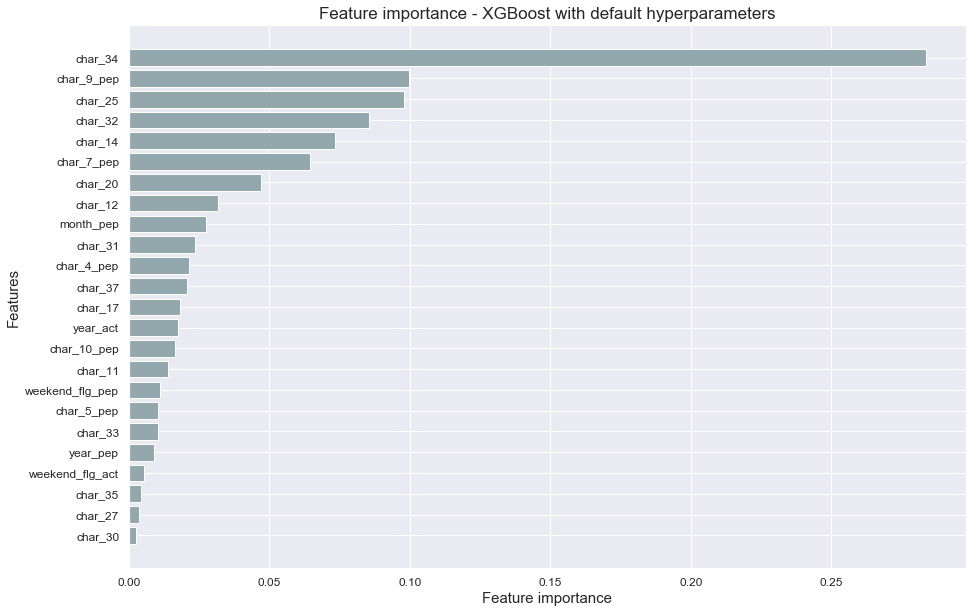

In [94]:
plot_feature_importance(xg, "XGBoost", X_train, random_seed)

### 2.3. CatBoost

In [105]:
cb.fit(X_train, y_train)

In [106]:
y_train_pred  = make_predictions(cb, X_train, y_train)
y_test_pred  = make_predictions(cb, X_test, y_test)

In [98]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [99]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [100]:
metrics_train

,metrics,scores
0,accuracy,0.831
1,precision,0.806
2,recall,0.815
3,f1,0.811
4,roc_auc,0.829


In [101]:
metrics_test

,metrics,scores
0,accuracy,0.819
1,precision,0.790
2,recall,0.806
3,f1,0.798
4,roc_auc,0.817


In [102]:
cm_train

,PN,PP
TN,803767,149232
TP,140482,620405


In [103]:
cm_test

,PN,PP
TN,222940,45855
TP,41722,172888


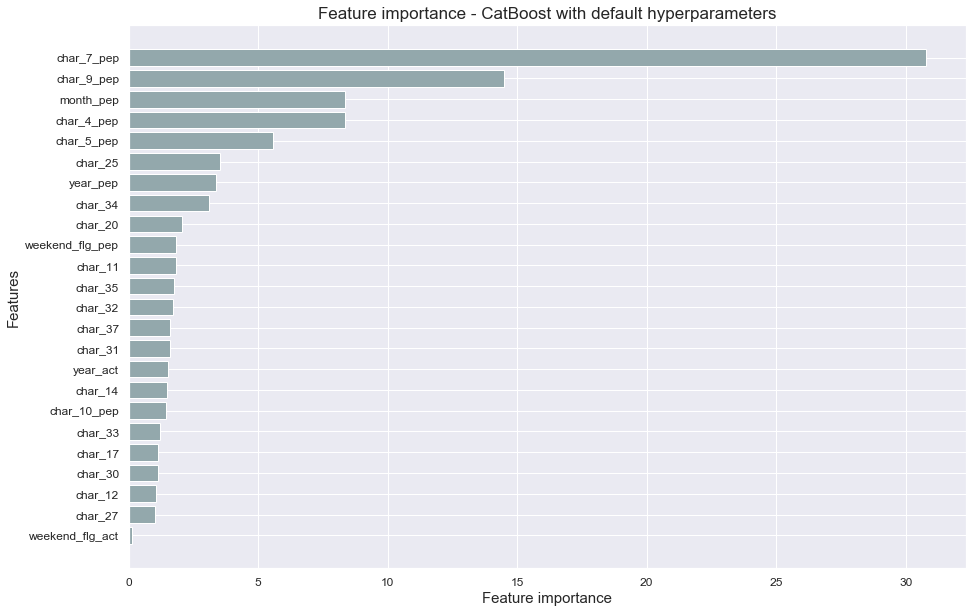

In [104]:
plot_feature_importance(cb, "CatBoost", X_train, random_seed)

### 3. Hyperparameter tuning

Amongst the three tested models **Random Forest** shows the best results with default parameters. For this specific model hyperparameter tuning will be performed.

#### 3.1. Visualisation of the parameters

Visualisation of hyperparameters is important in the light of choosing the right hyperparameters to tune.

Performance of the model will be evaluated based on **f1 score** because it combines the precision and recall scores.

In [10]:
scoring = 'f1'

In [33]:
def plot_validation_curve(X, y, param_name, range_param, scoring, random_seed):
    """
    The function takes in:
    - a dataframe with features (X)
    - a numpy array with the target variable (y)
    - the name of the parameter to visualise
    - the range of values of a given parameter (a range or a list of values)
    - the scoring function (e.g. roc_auc, f1, accuracy, etc.)
    
    The result of this function is a png file with the visualisation of the scoring function values depending on the paramater's values.
    """
    
    train_scores_arr, test_scores_arr = validation_curve(RandomForestClassifier(random_state = random_seed),
                                                        X = X_train, y = y_train, 
                                                        param_name = param_name, 
                                                        param_range = range_param,
                                                        cv = 3,
                                                        n_jobs = -1,
                                                        scoring = scoring)
    
    train_scores = np.mean(train_scores_arr, axis=1)
    test_scores = np.mean(test_scores_arr, axis=1)
    
    
    
    train_plot, = plt.plot(range_param, train_scores, color = '#A18276')
    test_plot, = plt.plot(range_param, test_scores, color = '#086788')
    plt.legend([train_plot, test_plot], ["train set", "test set"])
    plt.title(f"{scoring} values depending on {param_name}")
    plt.xlabel(f"{param_name} values")
    plt.ylabel(f"{scoring} scores")
    plt.savefig(f"./plots/{param_name}_{scoring}_validation.png")

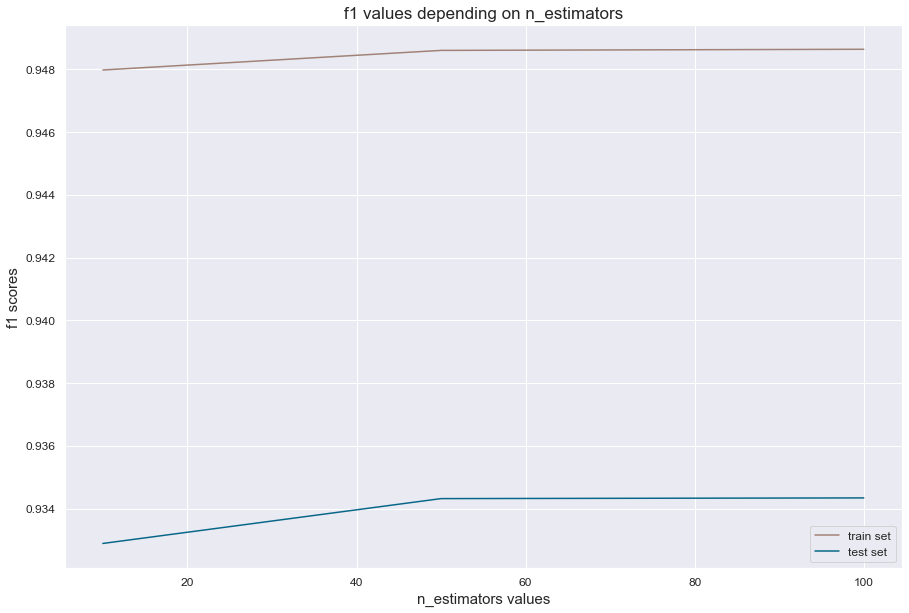

In [34]:
plot_validation_curve(X_train, y_train, 'n_estimators', [10, 50, 100], scoring, random_seed)

The number of trees tends to have a great impact on overfitting. In the range of 10 to 100, the more the trees, the less overfitted the model is.

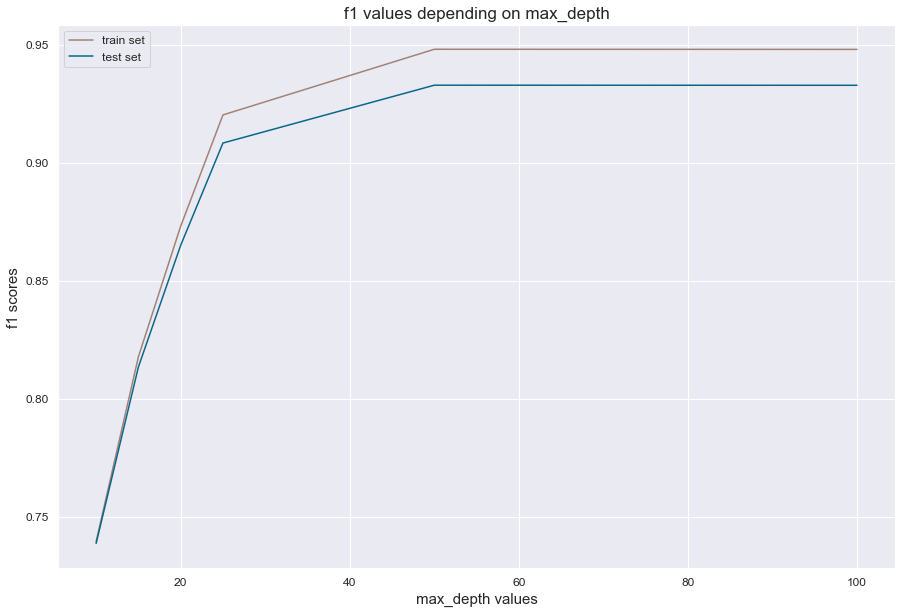

In [32]:
plot_validation_curve(X_train, y_train, 'max_depth', [10, 15, 20, 25, 50, 100], scoring, random_seed)

For max_depth <= 20 the model seems to perform almost the same on the train and test sets. However, the f1 score increases significantly till max_depth reaches 25. After that the increase is rather steady, but the difference in performance on the train and test set increases as well. In the next steps **max_depth values from 20 to 25** will be evaluated.

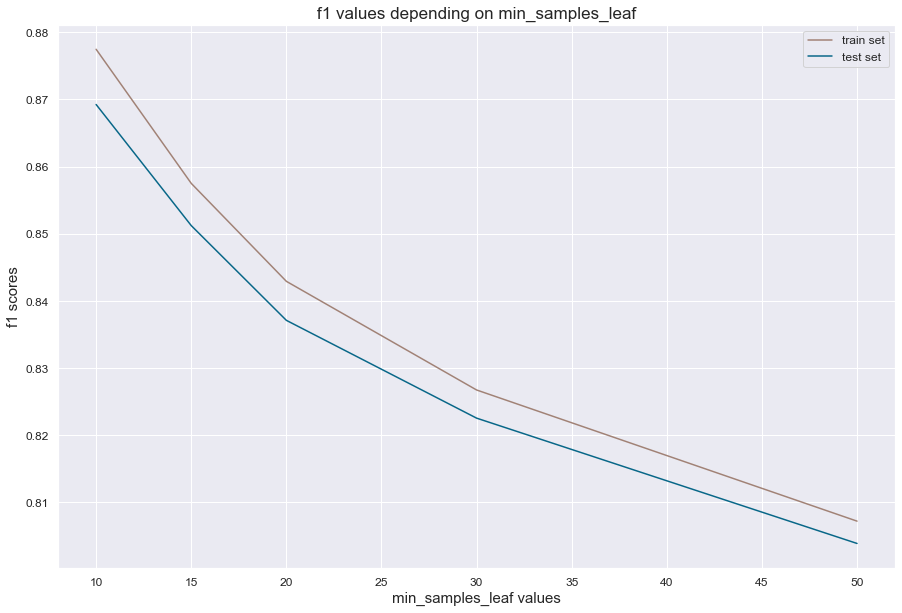

In [29]:
plot_validation_curve(X_train, y_train, 'min_samples_leaf', [10, 15, 20, 30, 50], scoring, random_seed)

The performance of the model decreases as the min_samples_leaf values increase, with the sharpert decrease between 10 and 20. Around min_samples_leaf = 20 the difference in performance on train and test set is the biggest. **Values from 10 to 18** will be tested in the Randomized Search.

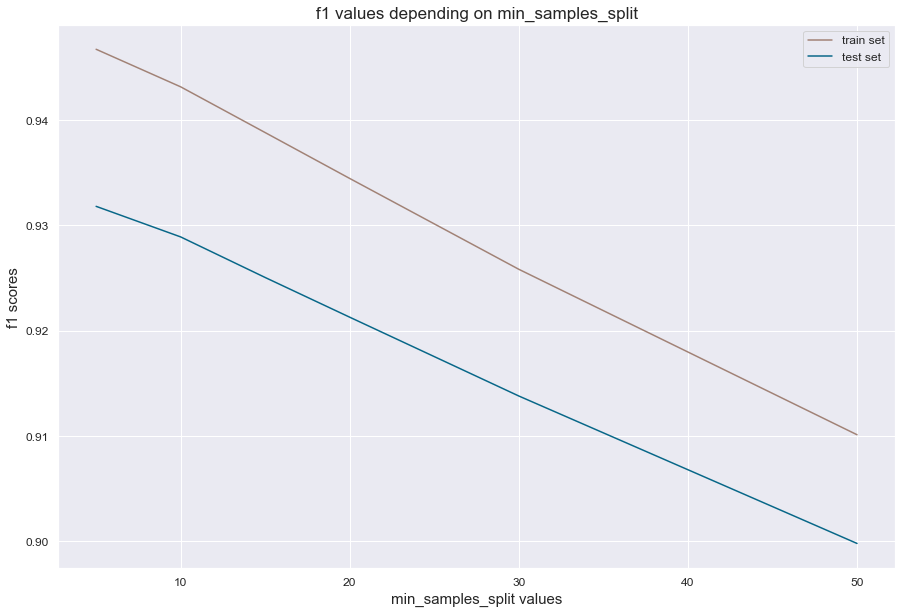

In [30]:
plot_validation_curve(X_train, y_train, 'min_samples_split', [5, 10, 15, 20, 30, 50], scoring, random_seed)

As the min_samples_split values increase, the performance of the model and the difference between performance on the train and test set decrease. **Values around 10** will be evaluated in the next step.

#### 3.2. Randomized Search

In [38]:
def rf_best_params(X, y, random_seed, scoring,
                         max_features, max_depth, min_samples_split, 
                         min_samples_leaf, n_estimators):
    
    rf_def = RandomForestClassifier(random_state = random_seed)
    
    grid = {'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'n_estimators': n_estimators}
    
    rf_rsearch = RandomizedSearchCV(rf_def, param_distributions=grid, n_iter= 3, n_jobs=-1, cv = 3)
    
    rf_rsearch.fit(X, y)
    
    return rf_rsearch.best_params_, rf_rsearch.best_score_

In [39]:
#base params
max_features = ['auto','log2']
max_depth = range(20, 26, 2)
min_samples_split = range(10,16,2)
min_samples_leaf = range(10, 18, 3)
n_estimators = [100]

In [40]:
best_params, best_score = rf_best_params(X_train, y_train, random_seed, scoring, max_features, max_depth, min_samples_split, min_samples_leaf, n_estimators)

In [41]:
best_params

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 13,
 'max_features': 'auto',
 'max_depth': 22}

In [42]:
best_score

0.8667110881353836

In [45]:
max_features = ['auto']
max_depth = range(21,24)
min_samples_split = range(10,12)
min_samples_leaf = range(11,14)
n_estimators = [100]

In [46]:
best_params1, best_score1 = rf_best_params(X_train, y_train, random_seed, scoring, max_features, max_depth, min_samples_split, min_samples_leaf,n_estimators)

In [47]:
best_params1

{'n_estimators': 100,
 'min_samples_split': 11,
 'min_samples_leaf': 13,
 'max_features': 'auto',
 'max_depth': 23}

In [48]:
best_score1

0.8700205264527512

In [50]:
if best_score1 > best_score:
    best_score = best_score1
    best_params = best_params1

In [53]:
del best_score1
del best_params1

In [49]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Although the results after hyperparameter tuning turned out to be worse than default scores, there are still good and I will stick to those hyperparameters. The reason for that is that the default parameters include a smaller number of trees and no limit in max_depth which easily leads to major overfitting.

### 4. Training the final model

In [109]:
rf_final = RandomForestClassifier(**best_params, random_state = random_seed)

In [110]:
rf_final

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=23, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [111]:
rf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=23, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [113]:
y_train_pred  = make_predictions(rf_final, X_train, y_train)
y_test_pred  = make_predictions(rf_final, X_test, y_test)

In [114]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [115]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [116]:
metrics_train

,metrics,scores
0,accuracy,0.875
1,precision,0.877
2,recall,0.835
3,f1,0.855
4,roc_auc,0.871


In [117]:
metrics_test

,metrics,scores
0,accuracy,0.838
1,precision,0.822
2,recall,0.812
3,f1,0.817
4,roc_auc,0.836


In [118]:
cm_train

,PN,PP
TN,863849,89150
TP,125600,635287


In [119]:
cm_test

,PN,PP
TN,231130,37665
TP,40410,174200


The scores are dissapointing as they are significantly worse than those of the default Random Forest parameters and they also tend to overfit more.

A different approach must be then taken into consideration.

### 5. Evaluating the model

#### 5.1. Random Forest with default params + more trees

In [18]:
rf_trees = RandomForestClassifier(n_estimators=200, random_state=random_seed)

In [19]:
rf_trees.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
y_train_pred  = make_predictions(rf_trees, X_train, y_train)
y_test_pred  = make_predictions(rf_trees, X_test, y_test)

In [21]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [22]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test = evaluate_cmatrix(y_test, y_test_pred)

In [32]:
metrics_train

,metrics,scores
0,accuracy,0.944
1,precision,0.942
2,recall,0.931
3,f1,0.937
4,roc_auc,0.943


In [24]:
metrics_test

,metrics,scores
0,accuracy,0.925
1,precision,0.918
2,recall,0.913
3,f1,0.916
4,roc_auc,0.924


In [25]:
cm_train

,PN,PP
TN,909243,43756
TP,52171,708716


In [26]:
cm_test

,PN,PP
TN,251300,17495
TP,18664,195946


The results are slightly less overfitted than in the case of Random Forest with default paramaters (default n_estimators=10 in sklearn 0.21.3).

In [27]:
sklearn.__version__

'0.21.3'

#### 5.2. CatBoost with different params

CatBoost with default parameters had pretty good results, so one of the option tested will be to train CatBoost with specified parameters.

**Specifying categorical columns**

In [37]:
cb_new = CatBoostClassifier(random_seed = random_seed)

In [56]:
#categorical (binary) columns
cols_cat = X_train.select_dtypes(include=['int']).columns

In [58]:
cat_idx = [X_train.columns.get_loc(c) for c in cols_cat]

In [60]:
cb_new.fit(X_train, y_train, cat_idx)

In [48]:
y_train_pred  = make_predictions(cb_new, X_train, y_train)
y_test_pred  = make_predictions(cb_new, X_test, y_test)

In [41]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [42]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [43]:
metrics_train

,metrics,scores
0,accuracy,0.831
1,precision,0.806
2,recall,0.815
3,f1,0.811
4,roc_auc,0.829


In [44]:
metrics_test

,metrics,scores
0,accuracy,0.819
1,precision,0.790
2,recall,0.806
3,f1,0.798
4,roc_auc,0.817


In [45]:
cm_train

,PN,PP
TN,803767,149232
TP,140482,620405


In [46]:
cm_test

,PN,PP
TN,222940,45855
TP,41722,172888


Specifying categorical columns did not improve the results of CatBoost. It might have been useful if the categorical variables in the dataset hadn't been encoded.

**Randomized Search**

In [19]:
cb_model = CatBoostClassifier(random_seed = random_seed)

In [29]:
params = {'learning_rate': [0.03, 0.1],
          'depth': [4, 6, 10],
          'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [30]:
rsearch_results = cb_model.randomized_search(params,
                                              X_train,
                                              y_train,
                                              cv=3,
                                              n_iter=5,
                                              partition_random_seed=0,
                                              calc_cv_statistics=True, 
                                              search_by_train_test_split=True,
                                              refit=True, 
                                              shuffle=True, 
                                              stratified=None, 
                                              train_size=0.8, 
                                              verbose=True)

0:	loss: 0.4343571	best: 0.4343571 (0)	total: 2m 12s	remaining: 8m 50s
1:	loss: 0.3877696	best: 0.3877696 (1)	total: 4m 29s	remaining: 6m 43s
2:	loss: 0.4348221	best: 0.3877696 (1)	total: 6m 34s	remaining: 4m 22s
3:	loss: 0.3882519	best: 0.3877696 (1)	total: 8m 43s	remaining: 2m 10s
4:	loss: 0.2481902	best: 0.2481902 (4)	total: 11m 57s	remaining: 0us
Estimating final quality...


In [48]:
rsearch_results['params']

{'depth': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [36]:
cb_new_params = CatBoostClassifier(**rsearch_results['params'], random_seed = random_seed)

In [45]:
cb_new_params.fit(X_train, y_train)

In [46]:
y_train_pred  = make_predictions(cb_new_params, X_train, y_train)
y_test_pred  = make_predictions(cb_new_params, X_test, y_test)

In [39]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [40]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [41]:
metrics_train

,metrics,scores
0,accuracy,0.903
1,precision,0.900
2,recall,0.879
3,f1,0.890
4,roc_auc,0.901


In [42]:
metrics_test

,metrics,scores
0,accuracy,0.896
1,precision,0.890
2,recall,0.873
3,f1,0.881
4,roc_auc,0.893


In [43]:
cm_train

,PN,PP
TN,878672,74327
TP,91839,669048


In [44]:
cm_test

,PN,PP
TN,245647,23148
TP,27298,187312


The results have improved due to the hyperparamter tuning. 

But still Random Forest Classifier with default parameters and a larger number of trees performs better and it will be chosen for this task.

### 6. Adjusting the threshold

By default the probability threshold is set to 0.5. But it may not be the optimal threshold for this task.

In [29]:
y_train_pred  = make_predictions(rf_trees, X_train, y_train)
y_test_pred  = make_predictions(rf_trees, X_test, y_test)

In [39]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [40]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [41]:
metrics_train

,metrics,scores
0,accuracy,0.903
1,precision,0.900
2,recall,0.879
3,f1,0.890
4,roc_auc,0.901


In [42]:
metrics_test

,metrics,scores
0,accuracy,0.896
1,precision,0.890
2,recall,0.873
3,f1,0.881
4,roc_auc,0.893


In [43]:
cm_train

,PN,PP
TN,878672,74327
TP,91839,669048


In [44]:
cm_test

,PN,PP
TN,245647,23148
TP,27298,187312


In [30]:
def plot_precision_recall_curve(y, y_pred):
    """
    The function takes in a numpy array with the target variable and a numpy array with the probabilities of the target=1.
    
    The function returns a png file with the plot of precision and recall depending on the probability threshold.
    """
    
    
    precisions, recalls, thresholds = precision_recall_curve(y, np.array(y_pred[:,1]))
    
    p1, = plt.plot(thresholds, precisions[:-1], color = '#A39BA8', linewidth = 3)
    p2, = plt.plot(thresholds, recalls[:-1], color = '#1C1C1C', linewidth = 3)
    plt.legend([p1, p2], ["precision", "recall"], loc = "lower left")
    plt.xlabel("Threshold")
    plt.ylabel("Precision/ recall values")
    plt.title("Precision vs recall depending on the threshold")
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.savefig(os.path.join(plots_path, 'precision_recall_threshold.png'))

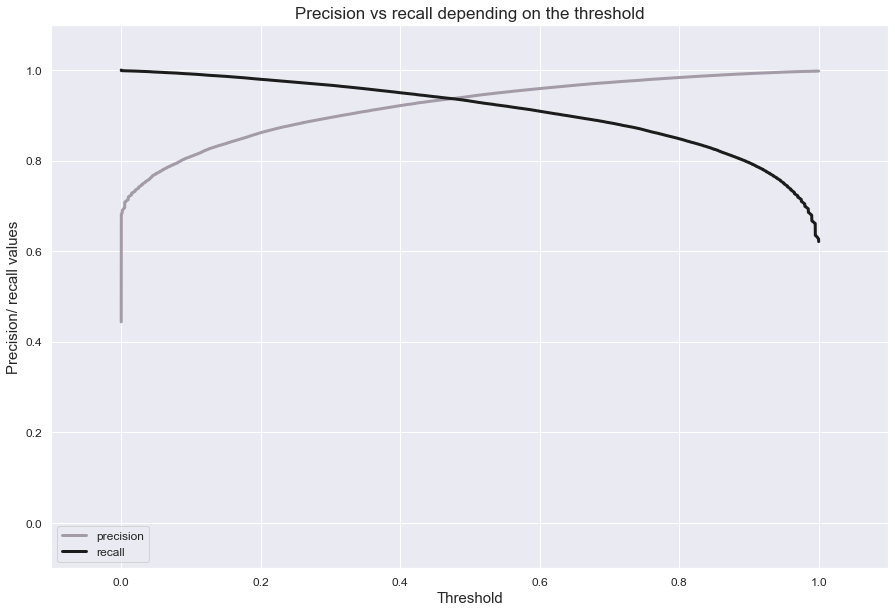

In [31]:
plot_precision_recall_curve(y_train, y_train_pred)

In [33]:
def optimal_thresh_roc_curve(y, y_pred):
    """
    The aim of the function is to find the best probability threshold based on the roc curve.
    
    The function takes in a numpy array with the target variable and a numpy array with the probabilities of the target=1.
    """
    fpr, tpr, thresholds = roc_curve(y, np.array(y_pred[:,1]))
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

In [34]:
thresh_roc = optimal_thresh_roc_curve(y_train, y_train_pred)

In [35]:
thresh_roc

0.44101190476190466

Both plots show that a threshold a bit below 0.5 (0.44) might be better in case of model performance.

In [42]:
metrics_train = evaluate_scores(y_train, y_train_pred, thresh_roc)
metrics_test = evaluate_scores(y_test, y_test_pred, thresh_roc)

In [43]:
cm_train = evaluate_cmatrix(y_train, y_train_pred, thresh_roc)
cm_test= evaluate_cmatrix(y_test, y_test_pred, thresh_roc)

In [44]:
metrics_train

,metrics,scores
0,accuracy,0.943
1,precision,0.931
2,recall,0.943
3,f1,0.937
4,roc_auc,0.943


In [45]:
metrics_test

,metrics,scores
0,accuracy,0.923
1,precision,0.903
2,recall,0.928
3,f1,0.915
4,roc_auc,0.924


In [46]:
cm_train

,PN,PP
TN,899474,53525
TP,43689,717198


In [47]:
cm_test

,PN,PP
TN,247339,21456
TP,15532,199078


Although the recall score on the test set is higher than in the case of threshold = 0.5 (0.928 vs. 0.913), the precision score has decreased (0.903 vs. 0.918). The accuracy and f1 scores also decreased by 0.02/0.001 and the roc auc score is the same.

Probability threshold = 0.5 seems to be a slightly better option as long as we consider f1 as the scoring function.

### 7. Exploring the influence of the features

#### 7.1. Feature importance

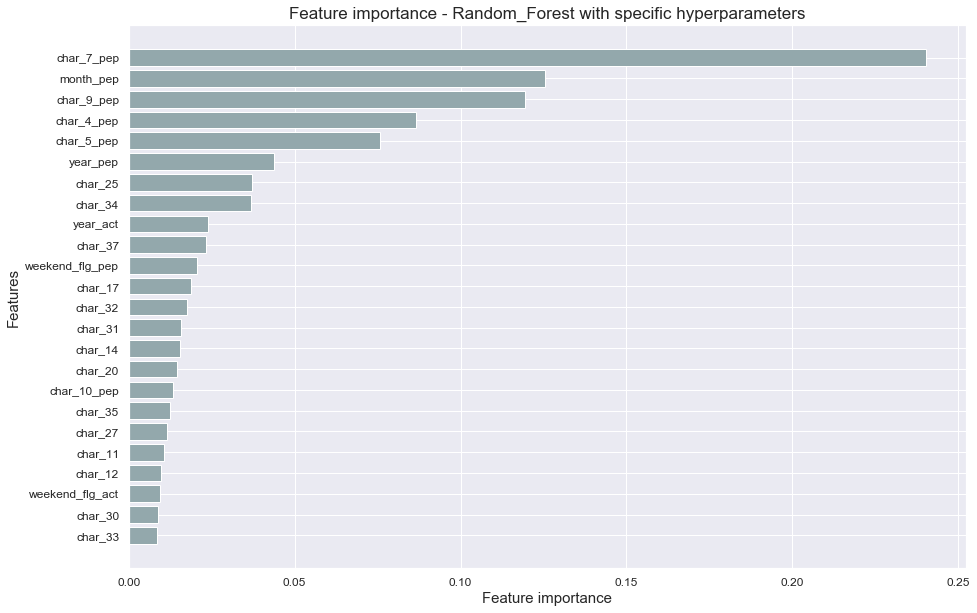

In [49]:
plot_feature_importance(rf_trees, "Random_Forest", X_train, random_seed, 'specific')

In [50]:
X_train.head()

,char_4_pep,char_5_pep,char_7_pep,char_9_pep,char_10_pep,char_11,char_12,char_14,char_17,char_20,char_25,char_27,char_30,char_31,char_32,char_33,char_34,char_35,char_37,month_pep,year_pep,weekend_flg_pep,year_act,weekend_flg_act
activity_index,,,,,,,,,,,,,,,,,,,,,,,,
"(2, 3769922)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576,0.091,0,0,0
"(2, 2255070)",0.469,0.162,0.519,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.477,0.091,0,0,1
"(2, 1102570)",0.535,0.064,0.390,0.249,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0.450,0.091,0,0,0
"(2, 4143394)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500,0.189,1,1,1
"(2, 3554173)",0.360,0.025,0.390,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.450,0.091,0,0,0


`char_7_pep` seems to have the biggest influence on the model's output. What's more, 6 of the features with the highest importance are those encoded using Mean Encoding and Frequency Encoding. They might be favoured because they might seem to be continuous variables. 

The first, second and fourth variables were encoding using Mean Encoder and the third, fifth and sixth - using the Frequency Encoder.

However, the plot does not show the kind of influence variables have on the output. That will be explored using parial dependence plots.

#### 7.2. Partial dependence plots

In [93]:
def partial_dependence_plots(model, X, y, max_features, hspace, size_x, size_y):
    feature_importance = pd.DataFrame(model.feature_importances_,
                                  index = X.columns,
                                  columns = ['importance']).sort_values('importance', ascending= False).reset_index()
    features = list(feature_importance.iloc[:max_features,0])
    
    rf_limit = RandomForestClassifier(n_estimators=200, random_state=random_seed)
    
    rf_limit.fit(X[features], y)
    
    plot_partial_dependence(rf_limit, X = X[features], features = features, feature_names = features, grid_resolution = 20)
    fig = plt.gcf()
    fig.suptitle(f"Partial dependence plots for {max_features} features with the highest importance")
    fig.subplots_adjust(hspace = hspace)
    fig.set_size_inches(size_x, size_y)
    plt.savefig(os.path.join(plots_path, 'partial_dependence_plots.png'))

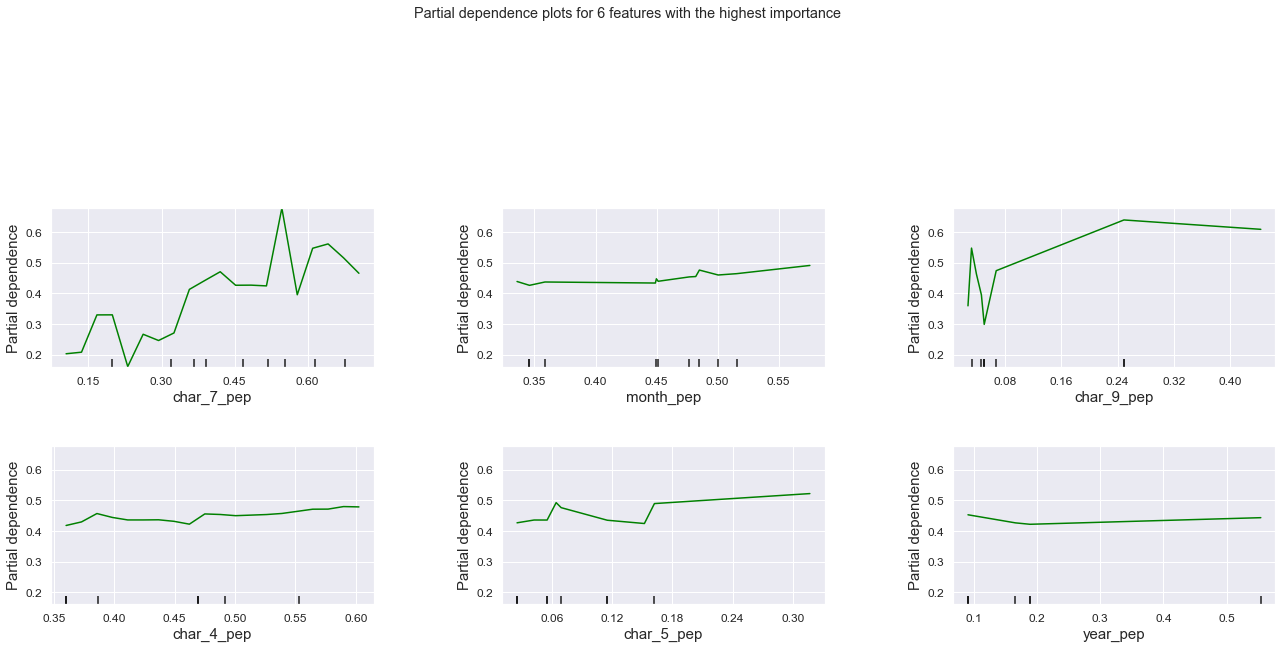

In [94]:
partial_dependence_plots(rf_trees, X_train, y_train, 6, 0.5, 20, 10)

The plots show the probability of the positive outcome depending on the value of a given variable. The direction of the influence strongly depends on the feature. 

For `char_7_pep` the direction of the influence is the most irregular. For `year_pep` the direction of the influence is the most regular, with the probability of the positive outcome decreasing till year_pep = 0.2 and slighlty increasing since then.